2023-10-23 12:56:40.514996: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-23 12:56:40.516729: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 12:56:40.547737: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 12:56:40.548303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 12:56:41.340999: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

supervised_data       var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)   var5(t-6)  var6(t-6)  \
6     35.930000  36.009998  35.369999  22.596661  12447600.0  35.740002   
7     35.740002  36.020000  35.540001  22.634604  11060500.0  35.799999   
8     35.790001  35.830002  35.509998  22.508137  10329200.0  35.599998   
9     35.610001  35.889999  35.389999  22.444929  11650400.0  35.500000   
10    35.580002  35.849998  35.480000  22.501833  10159800.0  35.590000   
...         ...        ...        ...        ...         ...        ...   
3834  51.020000  51.490002  50.230000  49.428200  29930300.0  51.480000   
3835  50.849998  51.540001  50.040001  49.370586  60963400.0  51.419998   
3836  51.660000  51.799999  50.610001  49.101753  23411500.0  51.139999   
3837  52.410000  54.200001  52.299999  51.262074  28625600.0  53.389999   
3838  52.759998  53.049999  51.099998  49.082546  27988700.0  51.119999   

      var7(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  ...   var5(t-1)  var6(t-1)  \
6  

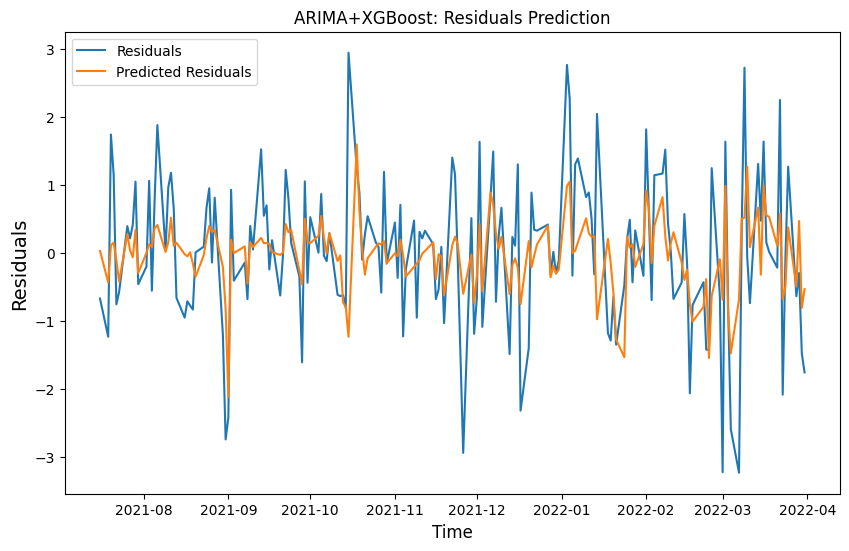

MSE: 6.06385
RMSE: 2.46249
MAE: 2.30544
R2: 0.53740


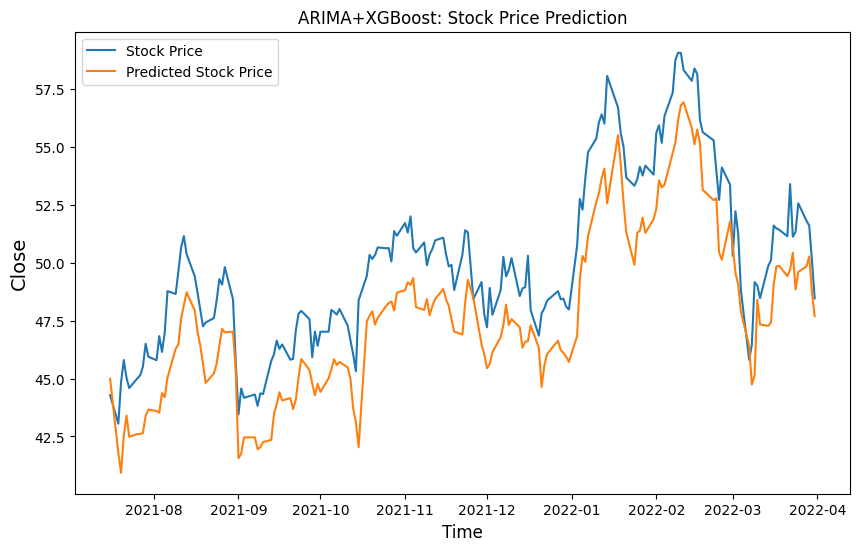

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from model import walk_forward_validation

data = pd.read_csv('./WFC.csv')
data.index = pd.to_datetime(data['Date'])
data = data.loc[:, ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']]
# data = pd.DataFrame(data, dtype=np.float64)
close = data.pop('Close')
data.insert(5, 'Close', close)
data1 = data.iloc[3659:, 5]
residuals = pd.read_csv('./ARIMA_residuals1.csv')
residuals.index = pd.to_datetime(residuals['Date'])
residuals.pop('Date')
merge_data = pd.merge(data, residuals, on='Date')
#merge_data = merge_data.drop(labels='2007-01-04', axis=0)
time = pd.Series(data.index[3659:])

Lt = pd.read_csv('./ARIMA.csv')
Lt = Lt.drop('Date', axis=1)
Lt = np.array(Lt)
Lt = Lt.flatten().tolist()

train, test = prepare_data(merge_data, n_test=180, n_in=6, n_out=1)

y, yhat = walk_forward_validation(train, test)
plt.figure(figsize=(10, 6))
plt.plot(time, y, label='Residuals')
plt.plot(time, yhat, label='Predicted Residuals')
plt.title('ARIMA+XGBoost: Residuals Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Residuals', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

finalpredicted_stock_price = [i + j for i, j in zip(Lt, yhat)]
#print('final', finalpredicted_stock_price)
evaluation_metric(data1, finalpredicted_stock_price)
plt.figure(figsize=(10, 6))
plt.plot(time, data1, label='Stock Price')
plt.plot(time, finalpredicted_stock_price, label='Predicted Stock Price')
plt.title('ARIMA+XGBoost: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()